# A2: Q4 and Q5

In [ ]:
import numpy as np
from scipy.sparse import dok_matrix
from copy import deepcopy
import matplotlib.pyplot as plt

# A2Q4a: `SparseMatMult`

In [ ]:
def SparseMatMult(G, x):
    '''
      y = SparseMatMult(G, x)
      
      Multiplies a vector (x) by a sparse matrix G,
      such that y = G @ x .
      
      Inputs:
        G is an NxM dictionary-of-keys (dok) sparse matrix
        x is an M-vector
      
      Output:
        y is an N-vector
    '''
    rows,cols = G.nonzero()
    Nrows,Ncols = np.shape(G)
    y = np.zeros(Nrows)
    
    # === YOUR CODE HERE ===
    size = len(rows)
    for n in range(size):
        i = rows[n]
        j = cols[n]
        y[i] += x[j]*G[i,j]
    
    return y

In [ ]:
# Simple test
#     [1  0  0]      [ 0.1 ]
# A = [0  1 -1]  b = [ 0.2 ]
#     [0  2  0]      [ 0.3 ]
A = dok_matrix((3,3), dtype=np.float32)
A[0,0] = 1
A[1,2] = -1
A[1,1] = 1
A[2,1] = 2
b = np.array([0.1, 0.2, 0.3])
y = SparseMatMult(A, b)
print(f'y = {y}')
print(f'Answer should be [ 0.1 -0.1  0.4]')

y = [ 0.1 -0.1  0.4]
Answer should be [ 0.1 -0.1  0.4]


# A2Q4b: `PageRank`

In [85]:
def PageRank(G, alpha):
    '''
     p, iters = PageRank(G, alpha)

     Computes the Google Page-rank for the network in the adjacency matrix G.
     
     Note: This function never forms a full RxR matrix, where R is the number
           of node in the network.

     Input
       G     is an RxR adjacency matrix, G[i,j] = 1 iff node j projects to node i
             Note: G must be a dictionary-of-keys (dok) sparse matrix
       alpha is a scalar between 0 and 1

     Output
       p     is a probability vector containing the Page-rank of each node
       iters is the number of iterations used to achieve a change tolerance
             of 1e-8 (changes to elements of p are all smaller than 1e-8)
    '''
    R = np.shape(G)[0]
    rows,cols = G.nonzero()
    iters = 0

    # === YOUR CODE HERE ===
    # calculate degrees
    deg = np.zeros(R)
    for j in range(R):
        for x in cols:
            if (x == j):
                deg[j] += 1
    #print(f'degs: {deg}')
    # make P
    P = G
    for n in range(len(rows)):
        i = rows[n]
        j = cols[n]
        P[i,j] = P[i,j]/deg[j]
        #print(f'value at {i},{j} = {P[i,j]}')
    # make initial p
    p = np.zeros(R)
    for i in range(R):
        p[i] = 1/R
    #print(f'p = {p}')
    
    # iterate
    diff = 1
    iters = 0
    while (abs(diff) > 0.00000001):
        oldp = np.zeros(R)
        for i in range(R):
            oldp[i] = p[i]
        #print(f'{oldp}')
        degtimesp = np.zeros(R)
        for i in range(R):
            if (deg[i] == 0):
                degtimesp[i] = (p[i])/R
            else:
                degtimesp[i] = 0
        ptimesp = SparseMatMult(P, p)
        #print(f'd times p = {degtimesp}')
        #print(f'P times p = {ptimesp}')
        # generate new p
        for i in range(R):
            p[i] = (ptimesp[i]+degtimesp[i])*alpha + (1-alpha)/R
        #print(f'    new p = {p}')
        # compare
        diffs = np.zeros(R)
        for i in range(R):
            diffs[i] = abs(p[i]-oldp[i])
            #print(f'diffs[{i}] = abs({p[i]}-{oldp[i]}) = {diffs[i]}')
        diff = max(diffs)
        iters += 1

    return p, iters

In [86]:
A = dok_matrix((6,6), dtype=np.float32)
A[1,0] = 1
A[0,3] = 1
A[0,5] = 1
A[2,1] = 1
A[3,1] = 1
A[3,2] = 1
A[4,2] = 1
A[5,2] = 1
A[5,4] = 1
# its the example from the lecture
alph = 0.85
p, iters = PageRank(A, alph)
print(f'p = {p}, {iters} iterations')

p = [0.26752809 0.25239887 0.13226952 0.16974589 0.06247637 0.11558128], 38 iterations


\pagebreak

## (a) Create sparse matrix

In [83]:
# === YOUR CODE HERE ===
A = dok_matrix((12,12), dtype=np.float32)
A[1,0] = 0.38
A[0,1] = 0.06
A[2,0] = 0.38
A[0,2] = 0.47
A[2,1] = 0.41
A[1,2] = 0.29
A[4,0] = 0.24
A[0,4] = 0.09
A[3,2] = 0.24
A[2,3] = 0.08
A[4,3] = 0.42
A[3,4] = 0.04
A[5,1] = 0.53
A[1,5] = 0.09
A[5,3] = 0.5
A[3,5] = 0.28
A[5,4] = 0.09
A[4,5] = 0.19
A[6,4] = 0.13
A[4,6] = 0.39
A[7,6] = 0.17
A[6,7] = 0.21
A[7,5] = 0.22
A[5,7] = 0.15
A[8,6] = 0.23
A[6,8] = 0.24
A[8,7] = 0.21
A[7,8] = 0.24
A[9,8] = 0.32
A[8,9] = 0.05
A[9,7] = 0.1
A[7,9] = 0.4
A[9,6] = 0.27
A[6,9] = 0.3
A[10,9] = 0.25
A[9,10] = 0.6
A[10,8] = 0.2
A[8,10] = 0.07
A[10,7] = 0.18
A[7,10] = 0.33
A[11,7] = 0.15
A[7,11] = 0.29
A[11,6] = 0.2
A[6,11] = 0.47
A[11,5] = 0.22
A[5,11] = 0.18
A[11,4] = 0.39
A[4,11] = 0.06

## (b) Run PageRank on network

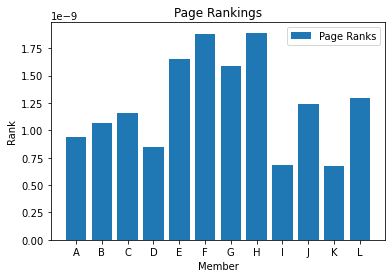

In [84]:
alph = 1
p, iters = PageRank(A, alph)
plt.bar(['A','B','C','D','E','F','G','H','I','J','K','L'],p, label="Page Ranks")
plt.legend()
plt.xlabel('Member')
plt.ylabel('Rank')
plt.title('Page Rankings')
plt.show()

## (c) Note to police

based on the data, i would conclude that H is the most influential, followed by F